# Mount drive contents

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading the excel data
farm number, crop yield, crop type

In [ ]:
!pip install openpyxl==3.0.0

     |████████████████████████████████| 172 kB 4.2 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=60db2337f8b47185f886509fc4d8375896cb39136066d769c009830388636ae9
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.9
    Uninstalling openpyxl-3.0.9:
      Successfully uninstalled openpyxl-3.0.9


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
noRC= pd.read_excel('/content/drive/MyDrive/image pixel-rows cols.xlsx',nrows=505)
numberRC = noRC.iloc[:,[0,1,2,3]].values

In [ ]:
numberRC

array([[  1.,  20.,   4.,   5.],
       [  2.,  16.,   4.,   4.],
       [  3.,  16.,   4.,   4.],
       ...,
       [502.,  20.,   5.,   4.],
       [503.,  25.,   5.,   5.],
       [504.,  20.,   4.,   5.]])

In [ ]:
imagesClassified = pd.read_excel('/content/drive/MyDrive/final_serial_field.xlsx',nrows=253)
imgCl= imagesClassified.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values

In [ ]:
imgCl[0]

array([1.0, 253.0, 45.9452773, datetime.datetime(2001, 6, 17, 0, 0),
       datetime.datetime(2001, 1, 8, 0, 0), 'L5', 'L5', 2.0, 'Wheat',
       2001.0], dtype=object)

# Decoding Geotiff files using Rasterio

In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 991 kB/s 


In [ ]:
import rasterio
from rasterio.plot import show

In [ ]:
# create an array of images and an array of images' band values
images=[]
data =[]
for i in range(1,505,1):
    value =str(i)
    images.append(rasterio.open("/content/drive/MyDrive/dataset_f/"+value+".tif"))
    sizeimg=len(images)
    imgNum = images[sizeimg-1].read()
    data.append(imgNum)

In [ ]:
len(data)

504

In [ ]:
'''
r, g, b, infrared, 

NDVI = (NIR – Red) / (NIR + Red)
GNDVI = (NIR-GREEN) /(NDVI+GREEN)
band 3 ->red band4->nir band 1->blue
EVI = 2.5 * ((Band 4 – Band 3) / (Band 4 + 6 * Band 3 – 7.5 * Band 1 + 1)).
SAVI = ((Band 4 – Band 3) / (Band 4 + Band 3 + 0.5)) * (1.5).

 * *  
 * *
'''

'\nr, g, b, infrared, \n\nNDVI = (NIR – Red) / (NIR + Red)\nGNDVI = (NIR-GREEN) /(NDVI+GREEN)\nband 3 ->red band4->nir band 1->blue\nEVI = 2.5 * ((Band 4 – Band 3) / (Band 4 + 6 * Band 3 – 7.5 * Band 1 + 1)).\nSAVI = ((Band 4 – Band 3) / (Band 4 + Band 3 + 0.5)) * (1.5).\n\n * *  \n * *\n'

In [ ]:
ndviinitial=[]
grndviinitial=[]
eviinitial=[]
saviinitial=[]
for i in range(0,504,1):
  temp=[]
  r=int(numberRC[i][3])
  c=int(numberRC[i][2])
  ndvi=[]
  grndvi=[]
  evi=[]
  savi=[]
  for k in range(0,r,1):
    for m in range(0,c,1):
      if data[i][3][k][m]+data[i][2][k][m] !=0:
        ndvi.append((int(data[i][3][k][m])-int(data[i][2][k][m]))/(int(data[i][3][k][m])+int(data[i][2][k][m]))) 
      else:
        ndvi.append(-500)
      if data[i][3][k][m]+data[i][1][k][m]+data[i][2][k][m]!= 0:
        grndvi.append((int(data[i][3][k][m])-(int(data[i][1][k][m])+int(data[i][2][k][m])))/(int(data[i][3][k][m])+(int(data[i][1][k][m])+int(data[i][2][k][m]))))
      else:
        grndvi.append(-500)
      evi.append(2.5*(int(data[i][3][k][m])-int(data[i][2][k][m]))/(int(data[i][3][k][m])+(2.4*int(data[i][2][k][m]))+1)) 
      savi.append((int(data[i][3][k][m])-int(data[i][2][k][m]))/(int(data[i][3][k][m])+int(data[i][2][k][m])+0.5)*(1+0.5)) 
  sum=0
  mean=0
  for h in range(0,len(ndvi),1):
    if not ndvi[h]==-500:
      sum+=ndvi[h]
  mean=sum/len(ndvi)
  for a in range(0,len(ndvi),1):
    if ndvi[a]==-500:
      ndvi[a]=mean
    temp.append(ndvi[a])
  ndviinitial.append(temp)
  temp=[]
  sum=0
  mean=0
  for h in range(0,len(grndvi),1):
    if not grndvi[h]==-500:
      sum+=grndvi[h]
  mean=sum/len(grndvi)
  for a in range(0,len(grndvi),1):
    if grndvi[a]==-500:
      grndvi[a]=mean
    temp.append(grndvi[a])
  grndviinitial.append(temp)
  temp=[]
  for h in range(0,len(evi),1):
    temp.append(evi[h])
  eviinitial.append(temp)
  temp=[]
  for h in range(0,len(savi),1):
    temp.append(savi[h])
  saviinitial.append(temp)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ushort_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ushort_scalars


In [ ]:
len(ndviinitial[0])

20

In [ ]:
excluded=[42,43,44,45,46,86,87,88,119,120,121,122,125,126,128,129,130,132,133] #,294,295,296,297,298,338,339,340,371,372,373,374,377,378,380,381,382,384,385]

####################### CODE HERE FOR NEGLECTING IMGES
#excluded.append(252)
#excluded.append(504)

####################### CODE HERE FOR INCLUDING IMGES TESTING--
testIncluded=[]
carefuldata=[]
#testIncluded.append(252)
for i in range(1,252,5):
  if i not in excluded:
    testIncluded.append(i)
    carefuldata.append(i)
##included.append(504)

In [ ]:
len(testIncluded)

47

In [ ]:
#total yield of testIncluded
y_test=[]
for i in range(0,len(testIncluded),1):
  y_test.append(imgCl[testIncluded[i]-1][2])

In [ ]:
import math

In [ ]:
#Y1.append([math.log10(Y[i])])
y_test2=[]
for i in range(0,len(y_test),1):
  y_test2.append([math.log10(y_test[i])])

In [ ]:
len(y_test)

47

In [ ]:
testIncluded

[1,
 6,
 11,
 16,
 21,
 26,
 31,
 36,
 41,
 51,
 56,
 61,
 66,
 71,
 76,
 81,
 91,
 96,
 101,
 106,
 111,
 116,
 131,
 136,
 141,
 146,
 151,
 156,
 161,
 166,
 171,
 176,
 181,
 186,
 191,
 196,
 201,
 206,
 211,
 216,
 221,
 226,
 231,
 236,
 241,
 246,
 251]

In [ ]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
nv=[]
gv=[]
ev=[]
sv=[]
testifyy=[]
originalImgNo=[]
testImgOriginalNo=[]
for i in range(0,252,1):
  r=int(numberRC[i][3])
  c=int(numberRC[i][2])
  if i+1 in excluded:
    continue
  for k in range(0,r-1,1):
    for m in range(0,c-1,1):
      # below 4 lines represent 4 VI of 8 pixels (4 each image - 2 images)
      t1=[ndviinitial[i][(k*c)+m],ndviinitial[i+252][(k*c)+m],ndviinitial[i][(k*c)+m+1],ndviinitial[i+252][(k*c)+m+1],ndviinitial[i][(k*c)+m+c], ndviinitial[i+252][(k*c)+m+c],ndviinitial[i][(k*c)+m+1+c],ndviinitial[i+252][(k*c)+m+1+c]]
      t2=[grndviinitial[i][(k*c)+m],grndviinitial[i+252][(k*c)+m],grndviinitial[i][(k*c)+m+1],grndviinitial[i+252][(k*c)+m+1],grndviinitial[i][(k*c)+m+c], grndviinitial[i+252][(k*c)+m+c],grndviinitial[i][(k*c)+m+1+c],grndviinitial[i+252][(k*c)+m+1+c]]
      t3=[eviinitial[i][(k*c)+m],eviinitial[i+252][(k*c)+m],eviinitial[i][(k*c)+m+1],eviinitial[i+252][(k*c)+m+1],eviinitial[i][(k*c)+m+c], eviinitial[i+252][(k*c)+m+c],eviinitial[i][(k*c)+m+1+c],eviinitial[i+252][(k*c)+m+1+c]]
      t4=[saviinitial[i][(k*c)+m],saviinitial[i+252][(k*c)+m],saviinitial[i][(k*c)+m+1],saviinitial[i+252][(k*c)+m+1],saviinitial[i][(k*c)+m+c], saviinitial[i+252][(k*c)+m+c],saviinitial[i][(k*c)+m+1+c],saviinitial[i+252][(k*c)+m+1+c]]
      if i+1 in testIncluded:
        if r==4 and c==4:
          if (k==0 and m==0) or (k==0 and m==2) or (k==2 and m==0) or (k==2 and m==2):
            testifyy.append(1)
            testImgOriginalNo.append(i+1)
          else:
            testifyy.append(0)
        elif r==5 and c ==4:
          if (k==0 and m==0) or (k==0 and m==2) or (k==2 and m==0) or (k==2 and m==2)or (k==3 and m==0) or (k==3 and m==2):
            testifyy.append(1)
            testImgOriginalNo.append(i+1)
          else:
            testifyy.append(0)
        elif r==4 and c ==5:
          if (k==0 and m==0) or (k==0 and m==2) or (k==0 and m==3) or (k==2 and m==0)or (k==2 and m==2) or (k==2 and m==3):
            testifyy.append(1)
            testImgOriginalNo.append(i+1)
          else:
            testifyy.append(0)
        elif r==5 and c ==5:
          if (k==0 and m==0) or (k==0 and m==2) or (k==0 and m==3) or (k==2 and m==0)or (k==2 and m==2) or (k==2 and m==3)or (k==3 and m==0) or (k==3 and m==2) or (k==3 and m==3):
            testifyy.append(1)
            testImgOriginalNo.append(i+1)
          else:
            testifyy.append(0)
      else:
        testifyy.append(0)

      nv.append(t1)
      gv.append(t2)
      ev.append(t3)
      sv.append(t4)



In [ ]:
testifyy

[1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [ ]:
len(testImgOriginalNo)

301

In [ ]:
#standardize the channels separately
from numpy import asarray
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# define data
'''
data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
        '''
#print(data)
# define standard scaler
scaler = StandardScaler()
# transform data

nv1 = scaler.fit_transform(asarray(nv))
gv1 = scaler.fit_transform(asarray(gv))
ev1 = scaler.fit_transform(asarray(ev))
sv1 = scaler.fit_transform(asarray(sv))
'''
nv1 = np.array(nv)
gv1 = np.array(gv)
ev1 = np.array(ev)
sv1 = np.array(sv)
'''

print(nv1[0])

[ 1.22380956 -1.90431743  1.52292905 -1.89661513  0.389563   -1.89084859
  1.13696219 -1.86201544]


In [ ]:
fd=[]
val=[]
for i in range(0,len(nv1),1):
  val=[nv1[i][0],gv1[i][0],ev1[i][0],sv1[i][0],
       nv1[i][1],gv1[i][1],ev1[i][1],sv1[i][1],
       nv1[i][2],gv1[i][2],ev1[i][2],sv1[i][2],
       nv1[i][3],gv1[i][3],ev1[i][3],sv1[i][3],
       nv1[i][4],gv1[i][4],ev1[i][4],sv1[i][4],
       nv1[i][5],gv1[i][5],ev1[i][5],sv1[i][5],
       nv1[i][6],gv1[i][6],ev1[i][6],sv1[i][6],
       nv1[i][7],gv1[i][7],ev1[i][7],sv1[i][7]]
  fd.append(val)


In [ ]:
len(fd)

2884

In [ ]:
fd[0]

[1.2238095607026547,
 1.1860725135651582,
 1.1503113223625854,
 1.1297106632904967,
 -1.904317425042554,
 -1.931607122441053,
 -1.6123697805353008,
 -1.7364267137423979,
 1.5229290545585967,
 1.506319694048424,
 1.4212284862425055,
 1.3680970894367799,
 -1.8966151337805497,
 -1.919038250483642,
 -1.5833761500238235,
 -1.7062387703396389,
 0.3895629990163167,
 0.34568424000839165,
 0.39097358486889255,
 0.4303962936438066,
 -1.8908485854005517,
 -1.9080206626681007,
 -1.6191997474613034,
 -1.7439592533581019,
 1.1369621859106032,
 1.0527113671090216,
 1.0706314316911056,
 1.0656110963413081,
 -1.8620154418164176,
 -1.8862850072945978,
 -1.595671155854983,
 -1.7169855224085449]

Augmentation

In [ ]:
X=[]
testX=[]
for i in range(0,len(fd),1):
  if(testifyy[i]==1):
    testX.append(fd[i])
    continue
  X.append(fd[i])
p1=[2,0,3,1]
p2=[3,2,1,0]
p3=[1,0,3,2]
p4=[2,3,0,1]
p5=[1,3,0,2]
p6=[3,1,2,0]
p7=[0,2,1,3]
p=[p1,p2,p3,p4,p5,p6,p7]
for i in range(0,7,1):
  for j in range(0,len(fd),1):
    temp=[]
    temp=[fd[j][8*p[i][0]],fd[j][8*p[i][0]+1],fd[j][8*p[i][0]+2],fd[j][8*p[i][0]+3],fd[j][8*p[i][0]+4],fd[j][8*p[i][0]+5],fd[j][8*p[i][0]+6],fd[j][8*p[i][0]+7],
          
          fd[j][8*p[i][1]],fd[j][8*p[i][1]+1],fd[j][8*p[i][1]+2],fd[j][8*p[i][1]+3],fd[j][8*p[i][1]+4],fd[j][8*p[i][1]+5],fd[j][8*p[i][1]+6],fd[j][8*p[i][1]+7],
          
          fd[j][8*p[i][2]],fd[j][8*p[i][2]+1],fd[j][8*p[i][2]+2],fd[j][8*p[i][2]+3],fd[j][8*p[i][2]+4],fd[j][8*p[i][2]+5],fd[j][8*p[i][2]+6],fd[j][8*p[i][2]+7],
          
          fd[j][8*p[i][3]],fd[j][8*p[i][3]+1],fd[j][8*p[i][3]+2],fd[j][8*p[i][3]+3],fd[j][8*p[i][3]+4],fd[j][8*p[i][3]+5],fd[j][8*p[i][3]+6],fd[j][8*p[i][3]+7]]
    X.append(temp)

In [ ]:
len(X) #before 24960

22771

In [ ]:
pixelYield= pd.read_excel('/content/drive/MyDrive/pixel cluster wise yield.xlsx',nrows=23073)
py = pixelYield.iloc[:,[1,2]].values

In [ ]:
len(py)

23073

In [ ]:
py[23071][0]

27.5760879725759

In [ ]:
import math

In [ ]:
Y=[]
twoTestY=[]
for i in range(0,23072,1):
  if (i>=0 and i<=2883) and testifyy[i]==1:
    twoTestY.append(py[i][0])
    continue
  Y.append(py[i][0])

In [ ]:
countt=0
for i in range(0,len(twoTestY),1):
  if(twoTestY[i]==0):
    countt+=1
print(countt)

0


In [ ]:
logTwoTestY=[]
for i in range(0,len(twoTestY),1):
  logTwoTestY.append([math.log10(twoTestY[i])])

In [ ]:
X1=[]
Y1=[]
yy=[]
for i in range(0,len(Y),1):
  if(Y[i]!=0):
    X1.append(X[i])
    Y1.append([math.log10(Y[i])])
    yy.append(pow(10,math.log10(Y[i])))

In [ ]:
X1

[[1.448003884539562,
  1.4483670185291528,
  1.361322643578364,
  1.315979087240449,
  -1.9121273421286176,
  -1.9241539871341116,
  -1.6182193307788977,
  -1.743837703203241,
  1.3080767278998382,
  1.2909492792871562,
  1.2226719149217087,
  1.1939868799713194,
  -1.8157875502643577,
  -1.8414697243890437,
  -1.5229090237434648,
  -1.6300860680612983,
  1.0715981817014677,
  1.00025694562514,
  1.0126020133306433,
  1.0121157700045194,
  -1.8732266437622949,
  -1.890302668199257,
  -1.6058860114919462,
  -1.727124640588561,
  1.264836397809963,
  1.211197506019066,
  1.1910289937480234,
  1.1742300043427614,
  -1.8367164678747954,
  -1.8663431897612797,
  -1.5765104897983142,
  -1.6928372096528916],
 [0.35578270740195117,
  0.30589920870025733,
  0.36982622425803613,
  0.40851439613888024,
  -1.895010706138938,
  -1.916230680739161,
  -1.6053920095618919,
  -1.7275954458213625,
  1.108157820672298,
  1.0164434898918195,
  1.0410914887113878,
  1.0319777275340907,
  -1.861657746238202

In [ ]:
fx_train=[] #final train x
fy_train=[] #final train y
for i in range(0,len(Y1),1):
  if (i+1)%5 ==0:
    testX.append(X1[i])
    logTwoTestY.append(Y1[i])
  else:
    fx_train.append(X1[i])
    fy_train.append(Y1[i])

In [ ]:
len(fx_train)

18166

In [ ]:
len(testX)

4842

In [ ]:
xxx=[]
yyy=[]
for i in range(0,len(fx_train)+len(testX),1):
  if i<len(fx_train):
    xxx.append(fx_train[i])
    yyy.append(fy_train[i])
  else:
    xxx.append(testX[i-len(fx_train)])
    yyy.append(logTwoTestY[i-len(fx_train)])

In [ ]:
len(yyy[0])

1

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

In [ ]:
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(np.array(xxx))
TargetVarScalerFit=TargetVarScaler.fit(np.array(yyy))

In [ ]:
# Generating the standardized values of X and y
x=PredictorScalerFit.transform(np.array(xxx))
y=TargetVarScalerFit.transform(np.array(yyy))

In [ ]:
final_xTrain=[]
final_yTrain=[]
final_xTest=[]
final_yTest=[]
for i in range(0,len(x),1):
  if i<len(fx_train):
    final_xTrain.append(x[i])
    final_yTrain.append(y[i])
  else:
    final_xTest.append(x[i])
    final_yTest.append(y[i])

In [ ]:
 # Split the data into training and testing set

from sklearn.model_selection import train_test_split
'''
X_train, X_test, y_train, y_test = train_test_split(np.array(X1),y, test_size=0.3, random_state=42)
'''

Xtrain=np.array(final_xTrain)
Ytrain=np.array(final_yTrain)
Xtest=np.array(final_xTest)
Ytest=np.array(final_yTest)
#Xtest, Xval, Ytest, Yval= train_test_split(Xtest,Ytest, test_size=0.5, random_state=42)
Xtest_final=[]
Ytest_final=[]
Xval=[]
Yval=[]
for i in range(0,len(Xtest),1):
  if i<len(Xtest)/2:
    Xtest_final.append(Xtest[i])
    Ytest_final.append(Ytest[i])
  else:
    Xval.append(Xtest[i])
    Yval.append(Ytest[i])

Xtest_final=np.array(Xtest_final)
Ytest_final=np.array(Ytest_final)
Xval=np.array(Xval)
Yval=np.array(Yval)

In [ ]:
# Quick sanity check with the shapes of Training and testing datasets
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest_final.shape)
print(Ytest_final.shape)
print(Xval.shape)
print(Yval.shape)

(18166, 32)
(18166, 1)
(2421, 32)
(2421, 1)
(2421, 32)
(2421, 1)


In [ ]:
!pip install tensorflow==2.7.0
!pip install keras

     |████████████████████████████████| 489.6 MB 24 kB/s 
     |████████████████████████████████| 1.3 MB 44.9 MB/s 
     |████████████████████████████████| 463 kB 65.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorflow-2.8.0


# HYPERPARAMTER TUNING

In [ ]:
def plotgraph(loss,val_loss,ep,bs):
  from matplotlib import pyplot as plt
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('model loss epoch-'+str(ep)+' batch size-'+str(bs))
  plt.ylabel('loss')
  plt.ylim(0,1)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
# importing the libraries
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              67584     
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2

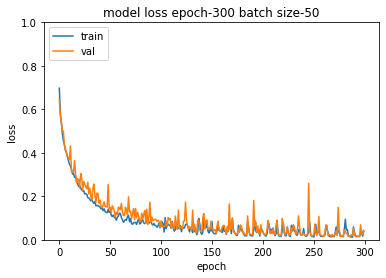

1 Parameters: batch_size: 50 - epochs: 300 Accuracy: 92.1142336374498
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2048)              67584     
                                                                 
 dense_11 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_12 (Dense)            (None, 512)               524800    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                  

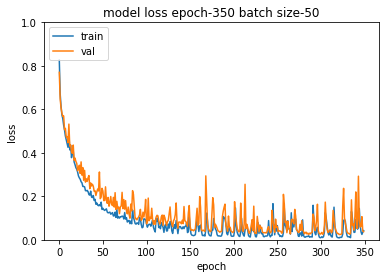

2 Parameters: batch_size: 50 - epochs: 350 Accuracy: 92.29250840867985
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 2048)              67584     
                                                                 
 dense_21 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_22 (Dense)            (None, 512)               524800    
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                 

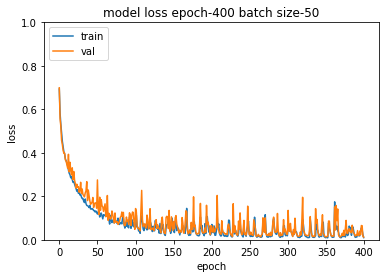

3 Parameters: batch_size: 50 - epochs: 400 Accuracy: 96.0010470985389
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 2048)              67584     
                                                                 
 dense_31 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_32 (Dense)            (None, 512)               524800    
                                                                 
 dense_33 (Dense)            (None, 256)               131328    
                                                                 
 dense_34 (Dense)            (None, 128)               32896     
                                                                 
 dense_35 (Dense)            (None, 64)                8256      
                                                  

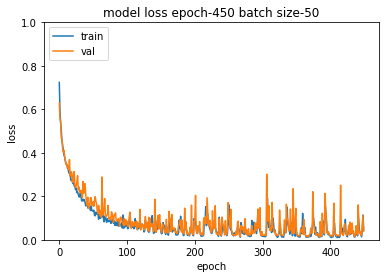

4 Parameters: batch_size: 50 - epochs: 450 Accuracy: 92.9100002757936
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 2048)              67584     
                                                                 
 dense_41 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_42 (Dense)            (None, 512)               524800    
                                                                 
 dense_43 (Dense)            (None, 256)               131328    
                                                                 
 dense_44 (Dense)            (None, 128)               32896     
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                  

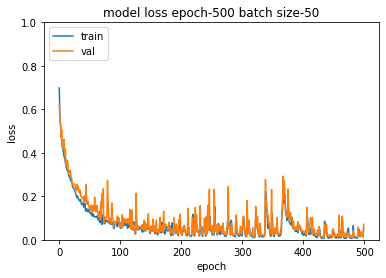

5 Parameters: batch_size: 50 - epochs: 500 Accuracy: 90.40965414329166
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 2048)              67584     
                                                                 
 dense_51 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_52 (Dense)            (None, 512)               524800    
                                                                 
 dense_53 (Dense)            (None, 256)               131328    
                                                                 
 dense_54 (Dense)            (None, 128)               32896     
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                 

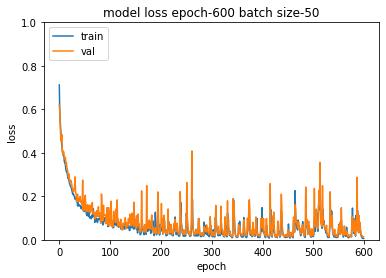

6 Parameters: batch_size: 50 - epochs: 600 Accuracy: 96.06185989542915
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 2048)              67584     
                                                                 
 dense_61 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_62 (Dense)            (None, 512)               524800    
                                                                 
 dense_63 (Dense)            (None, 256)               131328    
                                                                 
 dense_64 (Dense)            (None, 128)               32896     
                                                                 
 dense_65 (Dense)            (None, 64)                8256      
                                                 

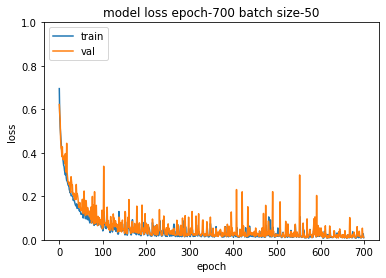

7 Parameters: batch_size: 50 - epochs: 700 Accuracy: 96.56689403692431
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 2048)              67584     
                                                                 
 dense_71 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_72 (Dense)            (None, 512)               524800    
                                                                 
 dense_73 (Dense)            (None, 256)               131328    
                                                                 
 dense_74 (Dense)            (None, 128)               32896     
                                                                 
 dense_75 (Dense)            (None, 64)                8256      
                                                 

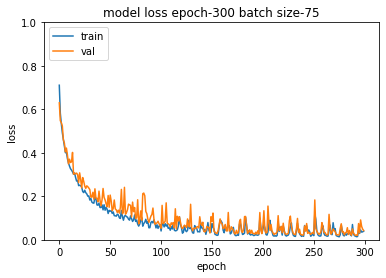

8 Parameters: batch_size: 75 - epochs: 300 Accuracy: 92.51512628559362
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 2048)              67584     
                                                                 
 dense_81 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_82 (Dense)            (None, 512)               524800    
                                                                 
 dense_83 (Dense)            (None, 256)               131328    
                                                                 
 dense_84 (Dense)            (None, 128)               32896     
                                                                 
 dense_85 (Dense)            (None, 64)                8256      
                                                 

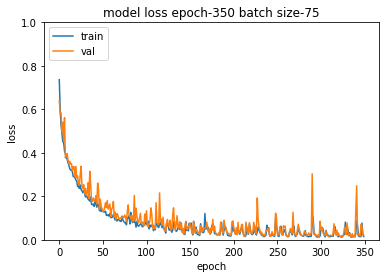

9 Parameters: batch_size: 75 - epochs: 350 Accuracy: 95.22148518535786
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 2048)              67584     
                                                                 
 dense_91 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_92 (Dense)            (None, 512)               524800    
                                                                 
 dense_93 (Dense)            (None, 256)               131328    
                                                                 
 dense_94 (Dense)            (None, 128)               32896     
                                                                 
 dense_95 (Dense)            (None, 64)                8256      
                                                 

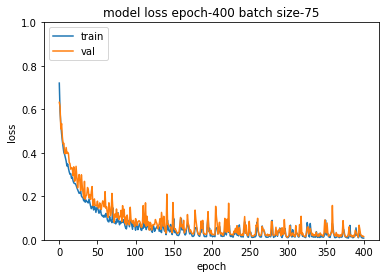

10 Parameters: batch_size: 75 - epochs: 400 Accuracy: 96.11729813016277
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 2048)              67584     
                                                                 
 dense_101 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_102 (Dense)           (None, 512)               524800    
                                                                 
 dense_103 (Dense)           (None, 256)               131328    
                                                                 
 dense_104 (Dense)           (None, 128)               32896     
                                                                 
 dense_105 (Dense)           (None, 64)                8256      
                                               

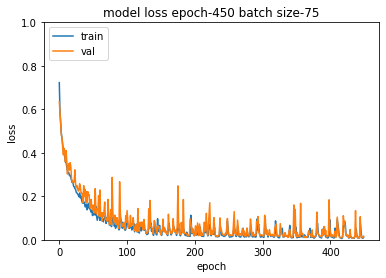

11 Parameters: batch_size: 75 - epochs: 450 Accuracy: 95.39330227342383
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 2048)              67584     
                                                                 
 dense_111 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_112 (Dense)           (None, 512)               524800    
                                                                 
 dense_113 (Dense)           (None, 256)               131328    
                                                                 
 dense_114 (Dense)           (None, 128)               32896     
                                                                 
 dense_115 (Dense)           (None, 64)                8256      
                                               

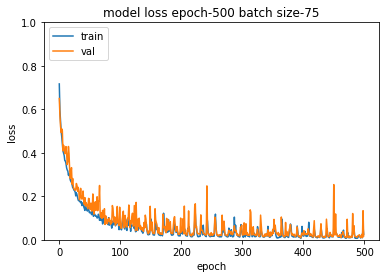

12 Parameters: batch_size: 75 - epochs: 500 Accuracy: 95.28826278272983
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 2048)              67584     
                                                                 
 dense_121 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_122 (Dense)           (None, 512)               524800    
                                                                 
 dense_123 (Dense)           (None, 256)               131328    
                                                                 
 dense_124 (Dense)           (None, 128)               32896     
                                                                 
 dense_125 (Dense)           (None, 64)                8256      
                                               

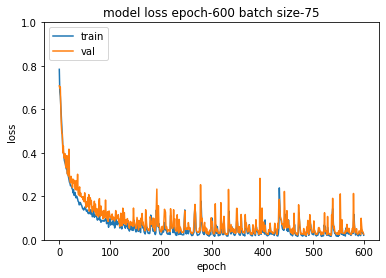

13 Parameters: batch_size: 75 - epochs: 600 Accuracy: 94.17996371712121
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 2048)              67584     
                                                                 
 dense_131 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_132 (Dense)           (None, 512)               524800    
                                                                 
 dense_133 (Dense)           (None, 256)               131328    
                                                                 
 dense_134 (Dense)           (None, 128)               32896     
                                                                 
 dense_135 (Dense)           (None, 64)                8256      
                                               

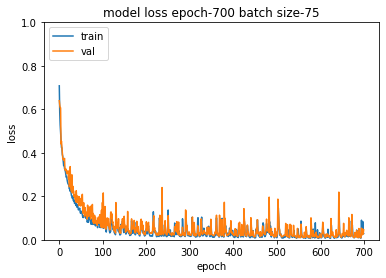

14 Parameters: batch_size: 75 - epochs: 700 Accuracy: 92.88861386920715
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 2048)              67584     
                                                                 
 dense_141 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_142 (Dense)           (None, 512)               524800    
                                                                 
 dense_143 (Dense)           (None, 256)               131328    
                                                                 
 dense_144 (Dense)           (None, 128)               32896     
                                                                 
 dense_145 (Dense)           (None, 64)                8256      
                                               

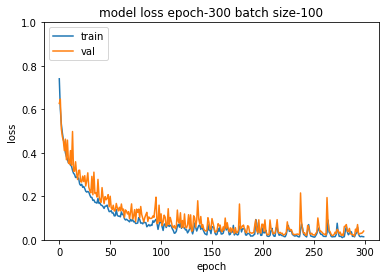

15 Parameters: batch_size: 100 - epochs: 300 Accuracy: 93.43754494123833
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_150 (Dense)           (None, 2048)              67584     
                                                                 
 dense_151 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_152 (Dense)           (None, 512)               524800    
                                                                 
 dense_153 (Dense)           (None, 256)               131328    
                                                                 
 dense_154 (Dense)           (None, 128)               32896     
                                                                 
 dense_155 (Dense)           (None, 64)                8256      
                                              

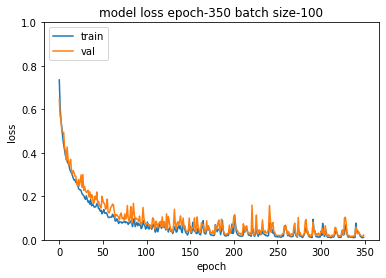

16 Parameters: batch_size: 100 - epochs: 350 Accuracy: 94.88008489487717
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 2048)              67584     
                                                                 
 dense_161 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_162 (Dense)           (None, 512)               524800    
                                                                 
 dense_163 (Dense)           (None, 256)               131328    
                                                                 
 dense_164 (Dense)           (None, 128)               32896     
                                                                 
 dense_165 (Dense)           (None, 64)                8256      
                                              

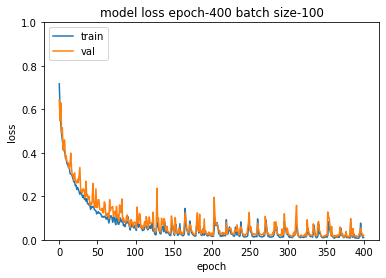

17 Parameters: batch_size: 100 - epochs: 400 Accuracy: 95.24177994692927
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 2048)              67584     
                                                                 
 dense_171 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_172 (Dense)           (None, 512)               524800    
                                                                 
 dense_173 (Dense)           (None, 256)               131328    
                                                                 
 dense_174 (Dense)           (None, 128)               32896     
                                                                 
 dense_175 (Dense)           (None, 64)                8256      
                                              

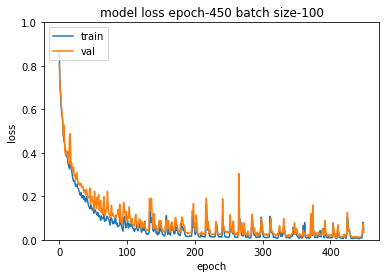

18 Parameters: batch_size: 100 - epochs: 450 Accuracy: 93.81992261679669
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 2048)              67584     
                                                                 
 dense_181 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_182 (Dense)           (None, 512)               524800    
                                                                 
 dense_183 (Dense)           (None, 256)               131328    
                                                                 
 dense_184 (Dense)           (None, 128)               32896     
                                                                 
 dense_185 (Dense)           (None, 64)                8256      
                                              

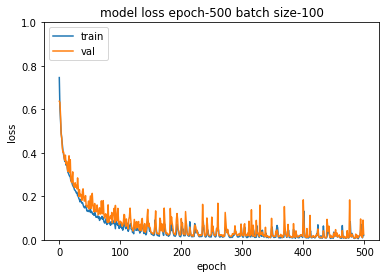

19 Parameters: batch_size: 100 - epochs: 500 Accuracy: 94.59454568259727
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_190 (Dense)           (None, 2048)              67584     
                                                                 
 dense_191 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_192 (Dense)           (None, 512)               524800    
                                                                 
 dense_193 (Dense)           (None, 256)               131328    
                                                                 
 dense_194 (Dense)           (None, 128)               32896     
                                                                 
 dense_195 (Dense)           (None, 64)                8256      
                                              

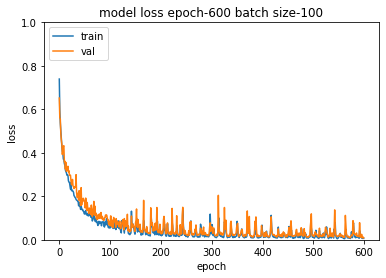

20 Parameters: batch_size: 100 - epochs: 600 Accuracy: 96.77120723311089
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_200 (Dense)           (None, 2048)              67584     
                                                                 
 dense_201 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_202 (Dense)           (None, 512)               524800    
                                                                 
 dense_203 (Dense)           (None, 256)               131328    
                                                                 
 dense_204 (Dense)           (None, 128)               32896     
                                                                 
 dense_205 (Dense)           (None, 64)                8256      
                                              

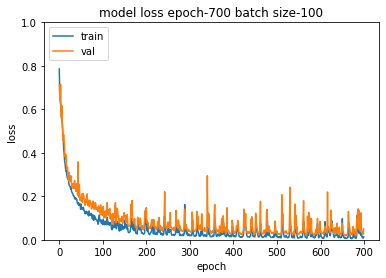

21 Parameters: batch_size: 100 - epochs: 700 Accuracy: 92.5039382960571
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 2048)              67584     
                                                                 
 dense_211 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_212 (Dense)           (None, 512)               524800    
                                                                 
 dense_213 (Dense)           (None, 256)               131328    
                                                                 
 dense_214 (Dense)           (None, 128)               32896     
                                                                 
 dense_215 (Dense)           (None, 64)                8256      
                                               

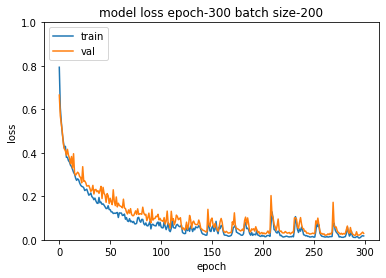

22 Parameters: batch_size: 200 - epochs: 300 Accuracy: 93.7133079100599
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_220 (Dense)           (None, 2048)              67584     
                                                                 
 dense_221 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_222 (Dense)           (None, 512)               524800    
                                                                 
 dense_223 (Dense)           (None, 256)               131328    
                                                                 
 dense_224 (Dense)           (None, 128)               32896     
                                                                 
 dense_225 (Dense)           (None, 64)                8256      
                                               

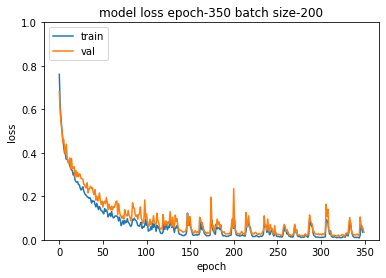

23 Parameters: batch_size: 200 - epochs: 350 Accuracy: 92.97726043912303
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_230 (Dense)           (None, 2048)              67584     
                                                                 
 dense_231 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_232 (Dense)           (None, 512)               524800    
                                                                 
 dense_233 (Dense)           (None, 256)               131328    
                                                                 
 dense_234 (Dense)           (None, 128)               32896     
                                                                 
 dense_235 (Dense)           (None, 64)                8256      
                                              

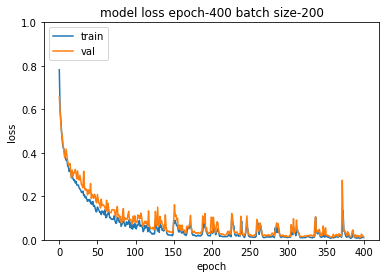

24 Parameters: batch_size: 200 - epochs: 400 Accuracy: 95.94242860058945
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_240 (Dense)           (None, 2048)              67584     
                                                                 
 dense_241 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_242 (Dense)           (None, 512)               524800    
                                                                 
 dense_243 (Dense)           (None, 256)               131328    
                                                                 
 dense_244 (Dense)           (None, 128)               32896     
                                                                 
 dense_245 (Dense)           (None, 64)                8256      
                                              

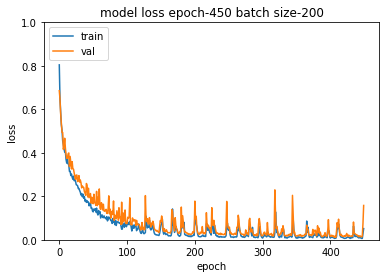

25 Parameters: batch_size: 200 - epochs: 450 Accuracy: 87.26980874336918
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_250 (Dense)           (None, 2048)              67584     
                                                                 
 dense_251 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_252 (Dense)           (None, 512)               524800    
                                                                 
 dense_253 (Dense)           (None, 256)               131328    
                                                                 
 dense_254 (Dense)           (None, 128)               32896     
                                                                 
 dense_255 (Dense)           (None, 64)                8256      
                                              

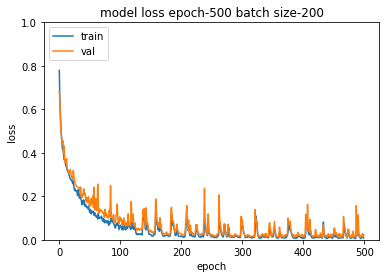

26 Parameters: batch_size: 200 - epochs: 500 Accuracy: 95.73268721540771
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_260 (Dense)           (None, 2048)              67584     
                                                                 
 dense_261 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_262 (Dense)           (None, 512)               524800    
                                                                 
 dense_263 (Dense)           (None, 256)               131328    
                                                                 
 dense_264 (Dense)           (None, 128)               32896     
                                                                 
 dense_265 (Dense)           (None, 64)                8256      
                                              

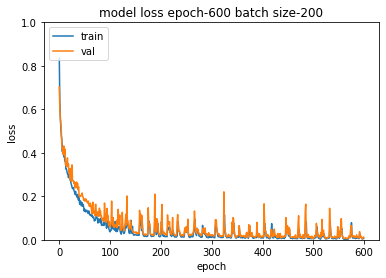

27 Parameters: batch_size: 200 - epochs: 600 Accuracy: 96.6230013887444
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_270 (Dense)           (None, 2048)              67584     
                                                                 
 dense_271 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_272 (Dense)           (None, 512)               524800    
                                                                 
 dense_273 (Dense)           (None, 256)               131328    
                                                                 
 dense_274 (Dense)           (None, 128)               32896     
                                                                 
 dense_275 (Dense)           (None, 64)                8256      
                                               

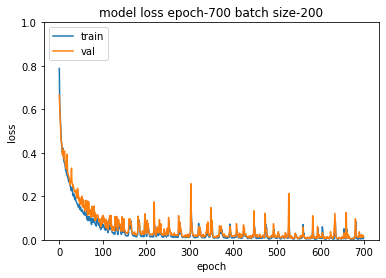

28 Parameters: batch_size: 200 - epochs: 700 Accuracy: 95.73703772088105
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_280 (Dense)           (None, 2048)              67584     
                                                                 
 dense_281 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_282 (Dense)           (None, 512)               524800    
                                                                 
 dense_283 (Dense)           (None, 256)               131328    
                                                                 
 dense_284 (Dense)           (None, 128)               32896     
                                                                 
 dense_285 (Dense)           (None, 64)                8256      
                                              

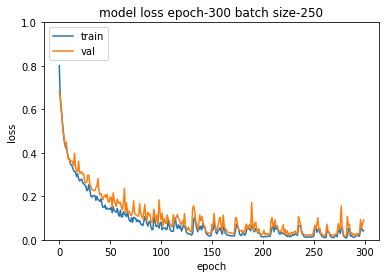

29 Parameters: batch_size: 250 - epochs: 300 Accuracy: 90.41796573039605
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_290 (Dense)           (None, 2048)              67584     
                                                                 
 dense_291 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_292 (Dense)           (None, 512)               524800    
                                                                 
 dense_293 (Dense)           (None, 256)               131328    
                                                                 
 dense_294 (Dense)           (None, 128)               32896     
                                                                 
 dense_295 (Dense)           (None, 64)                8256      
                                              

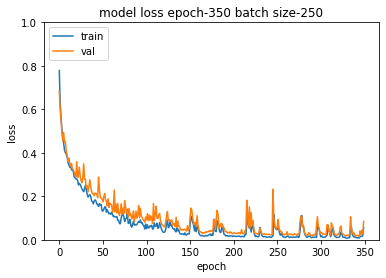

30 Parameters: batch_size: 250 - epochs: 350 Accuracy: 87.8550257165685
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_300 (Dense)           (None, 2048)              67584     
                                                                 
 dense_301 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_302 (Dense)           (None, 512)               524800    
                                                                 
 dense_303 (Dense)           (None, 256)               131328    
                                                                 
 dense_304 (Dense)           (None, 128)               32896     
                                                                 
 dense_305 (Dense)           (None, 64)                8256      
                                               

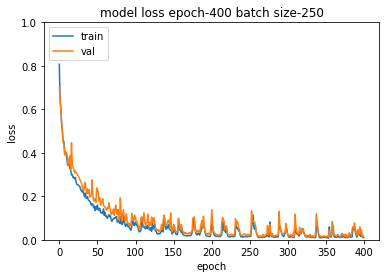

31 Parameters: batch_size: 250 - epochs: 400 Accuracy: 95.32518251744317
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_310 (Dense)           (None, 2048)              67584     
                                                                 
 dense_311 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_312 (Dense)           (None, 512)               524800    
                                                                 
 dense_313 (Dense)           (None, 256)               131328    
                                                                 
 dense_314 (Dense)           (None, 128)               32896     
                                                                 
 dense_315 (Dense)           (None, 64)                8256      
                                              

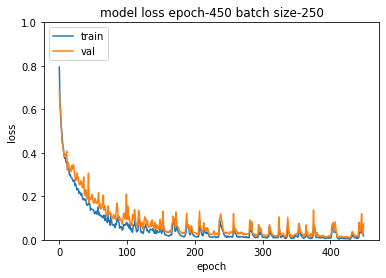

32 Parameters: batch_size: 250 - epochs: 450 Accuracy: 92.84532495281938
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_320 (Dense)           (None, 2048)              67584     
                                                                 
 dense_321 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_322 (Dense)           (None, 512)               524800    
                                                                 
 dense_323 (Dense)           (None, 256)               131328    
                                                                 
 dense_324 (Dense)           (None, 128)               32896     
                                                                 
 dense_325 (Dense)           (None, 64)                8256      
                                              

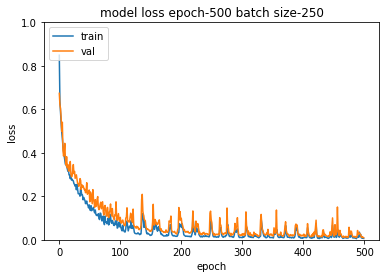

33 Parameters: batch_size: 250 - epochs: 500 Accuracy: 96.56800074861724
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_330 (Dense)           (None, 2048)              67584     
                                                                 
 dense_331 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_332 (Dense)           (None, 512)               524800    
                                                                 
 dense_333 (Dense)           (None, 256)               131328    
                                                                 
 dense_334 (Dense)           (None, 128)               32896     
                                                                 
 dense_335 (Dense)           (None, 64)                8256      
                                              

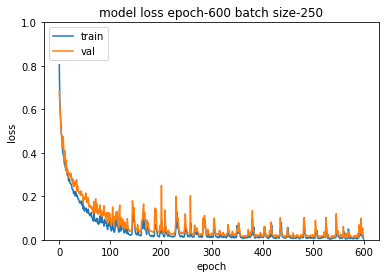

34 Parameters: batch_size: 250 - epochs: 600 Accuracy: 96.24137900282483
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_340 (Dense)           (None, 2048)              67584     
                                                                 
 dense_341 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_342 (Dense)           (None, 512)               524800    
                                                                 
 dense_343 (Dense)           (None, 256)               131328    
                                                                 
 dense_344 (Dense)           (None, 128)               32896     
                                                                 
 dense_345 (Dense)           (None, 64)                8256      
                                              

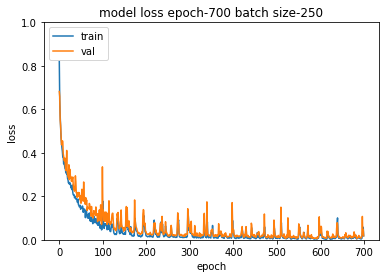

35 Parameters: batch_size: 250 - epochs: 700 Accuracy: 94.79608016857922


In [ ]:
def FunctionFindBestParams(Xtrain, Ytrain, Xtest_final, Ytest_final):
    
    # Defining the list of hyper parameters to try
    
    batch_size_list=[50,75,100,200,250]
    #batch_size_list=[75]
    #epoch_list  =   [50,100,150,200,300]
    epoch_list = [300,350,400,450,500,600,700]
    #epoch_list = [600,650,700,800,850]

    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
 
            # Defining the Input layer and FIRST hidden layer, both are same!
            model.add(Dense(units=2048, input_dim=32, kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=1024, kernel_initializer='normal', activation='relu'))
            
            # Defining the Second layer of the model
            # after the first layer we don't have to specify input_dim as keras configure it automatically
            model.add(Dense(units=512, kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
            # Defining the Second layer of the model
            # after the first layer we don't have to specify input_dim as keras configure it automatically
            model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))

            # Defining the third layer of the model
            model.add(Dense(units=16, kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=8, kernel_initializer='normal', activation='relu'))
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal',activation='linear'))
            opt = keras.optimizers.Adam(learning_rate=0.001)
            # Compiling the model
            #model.compile(loss='mean_squared_error', optimizer='Adam')
            model.compile(loss='mean_squared_error', optimizer=opt)

            model.summary()
 
            # Fitting the ANN to the Training set
            history = model.fit(Xtrain, Ytrain,batch_size = batch_size_trial, epochs = epochs_trial, validation_data=(Xval,Yval), shuffle=True,verbose=0)
            
            plotgraph(history.history['loss'],history.history['val_loss'],epochs_trial,batch_size_trial)

            y_test_orig=TargetVarScalerFit.inverse_transform(Ytest_final)
            
            Ypred=model.predict(Xtest_final)  
            Predictions=TargetVarScalerFit.inverse_transform(Ypred)
            Ypred_F=[]  #antilog of predicted value
            Ytest_F=[]    #antilog of y test
            for i in range(0,len(Ytest_final)):
              Ytest_F.append(pow(10,y_test_orig[i]))
              Ypred_F.append(pow(10,Predictions[i]))
            

            #MAPE = np.mean(100 * (np.abs((y_test-model.predict(X_test))/y_test)))
            #MAPE =100* (abs((Ytest_final-model.predict(Xtest_final)))/Ytest_final)
            MAPE =100* (abs((np.array(Ytest_F)-np.array(Ypred_F)))/np.array(Ytest_F))

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-np.mean(MAPE))
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
# Calling the function
ResultsData=FunctionFindBestParams(Xtrain, Ytrain, Xtest_final, Ytest_final)

In [ ]:
!pip install keras-tuner --upgrade

     |████████████████████████████████| 133 kB 5.2 MB/s 


In [ ]:
import keras_tuner as kt
from tensorflow import keras

In [ ]:
def funtuning(hp):
  
  kernel_initializer1=hp.Choice('kernel_initializer1',['HeUniform','normal'])
  units1=[64,128,32]
  hidden_layers=hp.Choice('Hidden-Layers', [1,2,3])
  #activation
  model = Sequential()
  
  # Defining the Input layer and FIRST hidden layer, both are same!
  model.add(Dense(units=32, input_dim=8, kernel_initializer=kernel_initializer1, activation='relu'))
  for i in range(hidden_layers):
    model.add(Dense(units=units1[i], kernel_initializer='HeUniform', activation='linear'))
  
  model.add(Dense(units=16, kernel_initializer='HeUniform', activation='linear'))
  model.add(Dense(1, kernel_initializer='HeUniform', activation='LeakyReLU' ))
  opt = keras.optimizers.Adam(learning_rate=0.0001)
  # Compiling the model
  model.compile(loss='mean_squared_error', optimizer=opt)
  return model

In [ ]:
tuner = kt.BayesianOptimization(
    funtuning,
    objective='val_loss',
    max_trials=5)

In [ ]:
tuner.search(Xtrain5, Ytrain, epochs=5, validation_data=(Xval5, Yval))

In [ ]:
tuner.results_summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


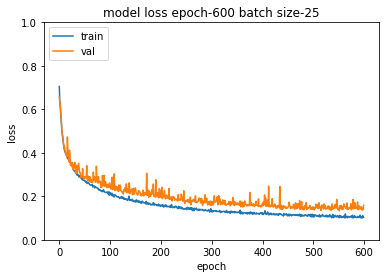

1 Parameters: batch_size: 25 - epochs: 600 Accuracy: 81.33450455795071
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_______________________________________________

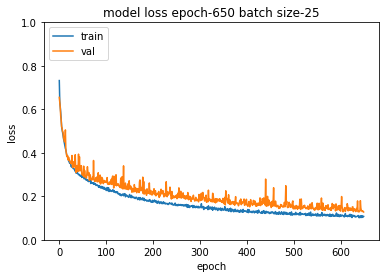

2 Parameters: batch_size: 25 - epochs: 650 Accuracy: 82.0431158451802
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
________________________________________________

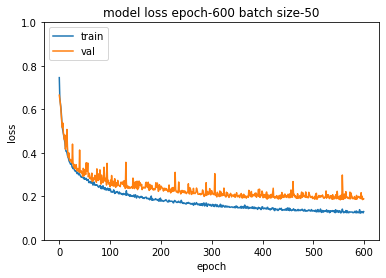

3 Parameters: batch_size: 50 - epochs: 600 Accuracy: 78.88433119471213
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_______________________________________________

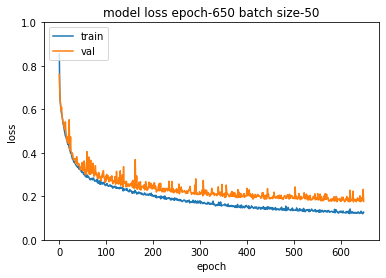

4 Parameters: batch_size: 50 - epochs: 650 Accuracy: 79.86603336010785
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                2112      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 8)                 136       
                                                                 
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_______________________________________________

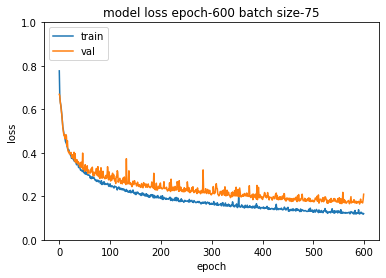

5 Parameters: batch_size: 75 - epochs: 600 Accuracy: 78.52677082920034
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                2112      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_______________________________________________

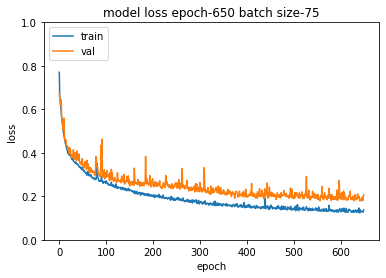

6 Parameters: batch_size: 75 - epochs: 650 Accuracy: 78.13277914911117
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                2112      
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 16)                528       
                                                                 
 dense_33 (Dense)            (None, 8)                 136       
                                                                 
 dense_34 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_______________________________________________

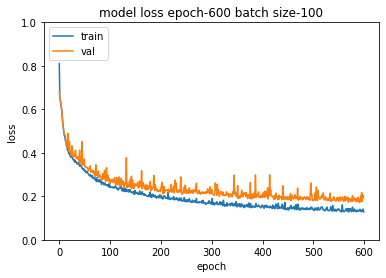

7 Parameters: batch_size: 100 - epochs: 600 Accuracy: 79.94230261762374
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                2112      
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 dense_38 (Dense)            (None, 8)                 136       
                                                                 
 dense_39 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
______________________________________________

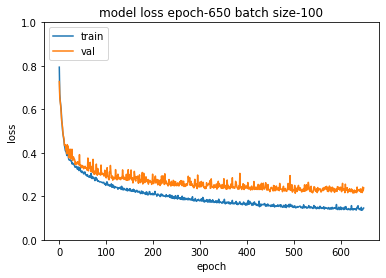

8 Parameters: batch_size: 100 - epochs: 650 Accuracy: 77.29505875380356
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                2112      
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dense_43 (Dense)            (None, 8)                 136       
                                                                 
 dense_44 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
______________________________________________

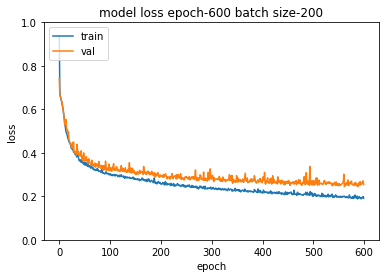

9 Parameters: batch_size: 200 - epochs: 600 Accuracy: 75.18028793233856
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                2112      
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 dense_47 (Dense)            (None, 16)                528       
                                                                 
 dense_48 (Dense)            (None, 8)                 136       
                                                                 
 dense_49 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
______________________________________________

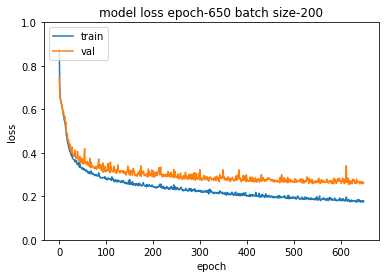

10 Parameters: batch_size: 200 - epochs: 650 Accuracy: 75.19187873491181
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 64)                2112      
                                                                 
 dense_51 (Dense)            (None, 32)                2080      
                                                                 
 dense_52 (Dense)            (None, 16)                528       
                                                                 
 dense_53 (Dense)            (None, 8)                 136       
                                                                 
 dense_54 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
____________________________________________

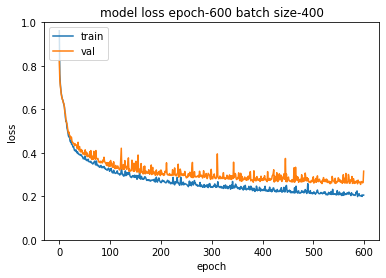

11 Parameters: batch_size: 400 - epochs: 600 Accuracy: 68.80040893937681
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 64)                2112      
                                                                 
 dense_56 (Dense)            (None, 32)                2080      
                                                                 
 dense_57 (Dense)            (None, 16)                528       
                                                                 
 dense_58 (Dense)            (None, 8)                 136       
                                                                 
 dense_59 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
____________________________________________

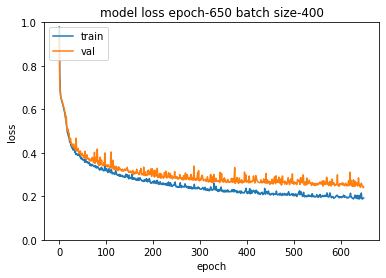

12 Parameters: batch_size: 400 - epochs: 650 Accuracy: 74.87381545451622


# MODEL

In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=2048, input_dim=32, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=1024, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=512, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))

# Defining the third layer of the model
model.add(Dense(units=16, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=8, kernel_initializer='normal', activation='relu'))
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal',activation='linear'))
#opt = keras.optimizers.Adam(learning_rate=0.001)
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='Adam')
#model.compile(loss='mean_squared_error', optimizer=opt)
# Fitting the ANN to the Training set
#model.fit(X_train, y_train ,batch_size = 100, epochs = 70, verbose=1)
#LeakyReLU

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              67584     
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2

In [ ]:
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(Xtrain, Ytrain, batch_size = 100, epochs=600, validation_data=(Xval,Yval), shuffle=True,verbose=0)
#batch_size=100, 
# Fitting the ANN to the Training set
#history = model.fit(X_train, y_train , batch_size = 15, epochs = 450, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(Xtest_final)
 
# Scaling the predicted Price data back to original price scale
Predictions1=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(Ytest_final)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(Xtest_final)

TestingData=pd.DataFrame(data=Test_Data)
TestingData['yield']=y_test_orig
TestingData['PredictedYield']=Predictions1
TestingData

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,yield,PredictedYield
0,1.223810,1.186073,1.150311,1.129711,-1.904317,-1.931607,-1.612370,-1.736427,1.522929,1.506320,...,1.136962,1.052711,1.070631,1.065611,-1.862015,-1.886285,-1.595671,-1.716986,1.514460,1.524719
1,1.236468,1.235645,1.162114,1.140225,-1.831761,-1.847110,-1.557762,-1.667577,1.949229,1.957661,...,1.959746,2.025635,1.868398,1.764504,-1.895206,-1.901743,-1.620721,-1.748667,1.649480,1.691087
2,0.080306,0.050682,0.133594,0.179637,-1.864440,-1.891849,-1.582416,-1.698586,0.786989,0.706521,...,0.930052,0.867890,0.878499,0.889859,-1.853108,-1.874024,-1.588931,-1.708483,1.851051,1.713863
3,1.161037,1.123163,1.091939,1.077550,-1.844386,-1.854001,-1.567298,-1.679557,1.760613,1.780571,...,1.959746,1.936430,1.868398,1.764504,-1.866350,-1.875903,-1.598949,-1.721123,1.652692,1.671884
4,0.224547,0.211986,0.256627,0.299479,-1.847738,-1.874798,-1.569828,-1.682738,0.901377,0.831226,...,0.394619,1.147481,-2.221525,-2.429123,-1.816718,-1.391066,-1.437097,-1.519321,1.794413,1.810624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,0.955090,0.789822,0.904092,0.907940,-0.993875,-0.945062,-0.872904,-0.855719,1.984656,1.975568,...,2.038460,1.954218,1.957790,1.836783,-0.735963,-0.738130,-0.682290,-0.640682,1.499827,1.491258
2417,0.683273,0.516526,0.665009,0.687668,-0.919237,-0.892106,-0.810510,-0.785398,1.129854,1.038046,...,-0.098137,0.887200,-2.222005,-2.431525,-1.073510,-0.439454,-1.448091,-1.530294,1.598807,1.583614
2418,0.922688,0.752294,0.875312,0.881683,-0.780295,-0.768661,-0.692770,-0.654492,0.921321,0.778989,...,1.161820,0.991843,1.097529,1.089072,-0.940913,-0.936548,-0.858669,-0.836472,1.577071,1.606393
2419,0.777883,0.632097,0.747622,0.764337,-0.711665,-0.677097,-0.633835,-0.589833,1.187985,1.030809,...,0.856616,0.702695,0.812836,0.828756,-0.907783,-0.846905,-0.830471,-0.804823,1.556685,1.593490


In [ ]:
print(Predictions)
print(Ytest_final)
print(len(Predictions))
print((Xtest_final))

[[-0.322204  ]
 [ 0.26406345]
 [ 0.3443243 ]
 ...
 [-0.03438962]
 [-0.07986003]
 [ 0.20100567]]
[[-0.35835691]
 [ 0.11744353]
 [ 0.82776373]
 ...
 [-0.13771858]
 [-0.20955917]
 [-0.00648225]]
2421
[[ 1.2219286   1.18409964  1.14844723 ... -1.88438265 -1.59387197
  -1.71504553]
 [ 1.23458156  1.23365629  1.16024031 ... -1.89983476 -1.61891452
  -1.74671672]
 [ 0.07893102  0.04907164  0.1325849  ... -1.87212582 -1.58713421
  -1.70654581]
 ...
 [ 0.92094022  0.75046007  0.87367884 ... -0.93500126 -0.85707667
  -0.83481366]
 [ 0.77619948  0.63030162  0.74609701 ... -0.84539244 -0.82888722
  -0.80317427]
 [ 0.99786459  0.85956395  0.94210147 ... -0.68286566 -0.67645775
  -0.6343885 ]]


In [ ]:
for key in history.history.keys():
    print(key)

loss
val_loss


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
min(history.history['val_loss'])

0.007709046360105276

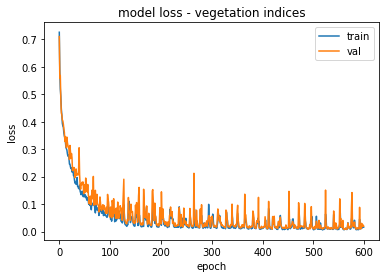

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss - vegetation indices')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
tl1=TestingData.iloc[:,[32]].values
tl2=TestingData.iloc[:,[33]].values
#TestingData[16]

t1=[]
t2=[]

for i in range(0, len(tl1),1):
  t1.append(pow(10,tl1[i]))
  t2.append(pow(10,tl2[i]))


In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
# Computing the absolute percent error

#APE=100*(abs(np.array(tl1)-np.array(tl2))/np.array(tl1))
APE=100*(abs(np.array(t1)-np.array(t2))/(np.array(t1)))
#TestingData['yield']=t1
#TestingData['predicted yield']=t2
TestingData['APE']=APE

#RMSE = np.sqrt(np.mean((t1-t2)*(t1-t2)))

mse = mean_squared_error(t1, t2)
rmse = math.sqrt(mse)

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData

The Accuracy of ANN model is: 95.75688132435283


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,yield,PredictedYield,APE
0,1.223810,1.186073,1.150311,1.129711,-1.904317,-1.931607,-1.612370,-1.736427,1.522929,1.506320,...,1.052711,1.070631,1.065611,-1.862015,-1.886285,-1.595671,-1.716986,1.514460,1.524719,2.390413
1,1.236468,1.235645,1.162114,1.140225,-1.831761,-1.847110,-1.557762,-1.667577,1.949229,1.957661,...,2.025635,1.868398,1.764504,-1.895206,-1.901743,-1.620721,-1.748667,1.649480,1.691087,10.054287
2,0.080306,0.050682,0.133594,0.179637,-1.864440,-1.891849,-1.582416,-1.698586,0.786989,0.706521,...,0.867890,0.878499,0.889859,-1.853108,-1.874024,-1.588931,-1.708483,1.851051,1.713863,27.085797
3,1.161037,1.123163,1.091939,1.077550,-1.844386,-1.854001,-1.567298,-1.679557,1.760613,1.780571,...,1.936430,1.868398,1.764504,-1.866350,-1.875903,-1.598949,-1.721123,1.652692,1.671884,4.518128
4,0.224547,0.211986,0.256627,0.299479,-1.847738,-1.874798,-1.569828,-1.682738,0.901377,0.831226,...,1.147481,-2.221525,-2.429123,-1.816718,-1.391066,-1.437097,-1.519321,1.794413,1.810624,3.803328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,0.955090,0.789822,0.904092,0.907940,-0.993875,-0.945062,-0.872904,-0.855719,1.984656,1.975568,...,1.954218,1.957790,1.836783,-0.735963,-0.738130,-0.682290,-0.640682,1.499827,1.491258,1.953917
2417,0.683273,0.516526,0.665009,0.687668,-0.919237,-0.892106,-0.810510,-0.785398,1.129854,1.038046,...,0.887200,-2.222005,-2.431525,-1.073510,-0.439454,-1.448091,-1.530294,1.598807,1.583614,3.437764
2418,0.922688,0.752294,0.875312,0.881683,-0.780295,-0.768661,-0.692770,-0.654492,0.921321,0.778989,...,0.991843,1.097529,1.089072,-0.940913,-0.936548,-0.858669,-0.836472,1.577071,1.606393,6.984832
2419,0.777883,0.632097,0.747622,0.764337,-0.711665,-0.677097,-0.633835,-0.589833,1.187985,1.030809,...,0.702695,0.812836,0.828756,-0.907783,-0.846905,-0.830471,-0.804823,1.556685,1.593490,8.844201


In [ ]:
rmse

4.1779949443942

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
r2s = r2_score(t1,t2)
print("R2 score:", r2s)

R2 score: 0.9872097307875317


In [ ]:
totalYield=[]
tyld=0
count=0
for i in range(0,len(testImgOriginalNo)+1,1):
  if i!=0:
    if i==len(testImgOriginalNo) or testImgOriginalNo[i]!=testImgOriginalNo[i-1]:
      if(r==4 and c==4):
        totalYield.append(tyld/4) 
      if(r==5 and c==4):
        totalYield.append(tyld/20)
      if(r==4 and c==5):
        totalYield.append(tyld/20) 
      if(r==5 and c==5):
        totalYield.append(tyld/25)
      if(i==len(testImgOriginalNo)):
        break
      tyld=0
      count=0
  count+=1
  r=int(numberRC[testImgOriginalNo[i]-1][3])
  c=int(numberRC[testImgOriginalNo[i]-1][2])
  if(r==4 and c==4):
    tyld+=t2[i]
  if(r==5 and c==4):
    if count<=4:
      tyld+=(4*t2[i])
    else:
      tyld+=(2*t2[i])
  if(r==4 and c==5):
    if count%3==0:
      tyld+=(2*t2[i])
    else:
      tyld+=(4*t2[i])
  if(r==5 and c==5):
    if count%3==0 and count<8:
      tyld+=(2*t2[i])
    elif count<=8:
      tyld+=(4*t2[i])
    else:
      tyld+=t2[i]

In [ ]:
tyield=[]
for i in range(0,len(totalYield),1):
  tyield.append(totalYield[i][0])

In [ ]:
r2s = r2_score(y_test,tyield)
print("R2 score:", r2s)

R2 score: 0.9545688332696758


In [ ]:
APE2=100*(abs(np.array(y_test)-np.array(tyield))/(np.array(y_test)))
#print(len(APE2[0]))
#TestingData['yield']=t1
#TestingData['predicted yield']=t2
#TestingData['APE']=APE

#RMSE = np.sqrt(np.mean((t1-t2)*(t1-t2)))
mse = mean_squared_error(np.array(y_test), np.array(tyield))
rmse = math.sqrt(mse)
print("rmse:",rmse)
print("Mean APE:",np.mean(APE2))

print('The Accuracy of ANN model is:', 100-np.mean(APE2))
#TestingData

rmse: 8.230780667199701
Mean APE: 11.161434003934051
The Accuracy of ANN model is: 88.83856599606595


In [ ]:
totalYield
for i in range(0,len(y_test),1):
  print(str(totalYield[i][0])+"---"+str(y_test[i]))

44.6476---45.9452773
41.358665---37.82360859
45.165657---50.37372841
37.49392---37.53295359
38.56105---45.70405149
15.957293---15.55727855
30.335133---41.45149817
35.175797---26.45345912
13.361817---14.69808015
49.970833---51.77627053
47.885025---46.58575576
48.13455---51.5871123
30.764042---29.64733017
44.026886---57.0471885
110.135925---107.8329075
113.24298---121.8125916
28.199226---28.64035955
38.5082---36.79817877
33.69001---33.26248104
37.7131---38.50488181
35.970634---41.57028353
34.463047---29.81087404
76.49399---92.90412771
38.117508---46.42043367
48.95412---55.72247951
71.49414---56.19394036
53.453503---61.2080608
52.866974---69.9343125
19.745296---21.97965373
34.162964---27.67796592
26.951797---27.94514
29.237976---29.2600747
31.528738---32.09592117
47.441826---41.84337572
42.75766---54.77032407
37.580357---35.53285287
36.545708---36.49954085
39.419724---41.39820866
162.11078---167.1894184
166.6336---170.5874155
146.12596---159.0067773
94.91175---80.91582677
109.73601---138.

In [ ]:
output2=pd.DataFrame()
output2['predicted data farm yield']=tyield
output2['test data farm yield']=y_test

In [ ]:
output2

,predicted data farm yield,test data farm yield
0,44.647598,45.945277
1,41.358665,37.823609
2,45.165657,50.373728
3,37.493919,37.532954
4,38.561050,45.704051
5,15.957293,15.557279
6,30.335133,41.451498
7,35.175797,26.453459
8,13.361817,14.698080
9,49.970833,51.776271


In [ ]:
testf=[]
predf=[]
for i in range(0,len(tyield),1):
  testf.append(y_test[i])
  predf.append(tyield[i])

No handles with labels found to put in legend.


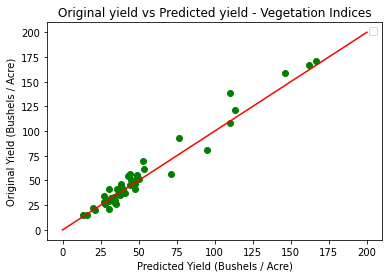

In [ ]:
import matplotlib.pyplot as plt
#k= pd.DataFrame({'Actual': testf, 'Predicted':predf})
#k1=testf.head(15)
#k2=predf.head(15)
plt.scatter(predf,testf,color='g')
x = np.linspace(0, 200, 10)
y=x
plt.plot(x,y,'-r')

#plt.plot(k2, label = "predicted yield")
plt.xlabel('Predicted Yield (Bushels / Acre)')
# Set the y axis label of the current axis.
plt.ylabel('Original Yield (Bushels / Acre)')
# Set a title of the current axes.
plt.title('Original yield vs Predicted yield - Vegetation Indices')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

Text(0.5, 1.0, 'Original vs Predicted - Vegetation indices')

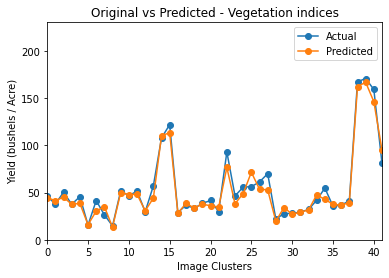

In [ ]:
import pandas as pd
df1= pd.DataFrame({'Actual': testf, 'Predicted':predf})
"""df2 = df1.head(15)
df2"""
df1.plot(kind = 'line', marker = 'o')
plt.xlabel('Image Clusters')
# Set the y axis label of the current axis.
plt.ylabel('Yield (bushels / Acre)')
plt.ylim([0, 230])
plt.xlim([0, 41])
plt.title('Original vs Predicted - Vegetation indices')

In [ ]:
#GPU count and name
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-982f5efe-af6b-918b-c75e-57ed8aa257c1)


In [ ]:
#use this command to see GPU activity while doing Deep Learning tasks, for this command 'nvidia-smi' and for above one to work, go to 'Runtime > change runtime type > Hardware Accelerator > GPU'
!nvidia-smi

Sat May 14 06:11:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    34W / 250W |    541MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz


In [ ]:
!lscpu | grep "MHz"

CPU MHz:             2299.998


In [ ]:
#memory that we can use
!free -h --si | awk  '/Mem:/{print $2}'

13G


In [ ]:
#hard disk space that we can use
!df -h / | awk '{print $4}'

Avail
127G


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         167G   40G  127G  24% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  812M  59% /sbin/docker-init
tmpfs           6.4G   40K  6.4G   1% /var/colab
/dev/sda1       174G   45G  129G  26% /opt/bin/.nvidia
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  119M   15G   1% /content/drive


In [ ]:
from psutil import *

In [ ]:
virtual_memory()

svmem(total=13617745920, available=10041614336, percent=26.3, used=3679346688, free=826535936, active=3565027328, inactive=8579854336, buffers=211107840, cached=8900755456, shared=11730944, slab=387338240)

In [ ]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2299.998
BogoMIPS:            4599.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs 